In [5]:
# from pulp import *
from pulp import LpProblem, LpMaximize, LpVariable, LpInteger, LpStatus, lpSum, value

In [6]:
from_nodes = [1, 2, 3]
to_nodes = [1, 2, 3, 4]
ucap = {1: 1, 2: 2, 3: 2}
vcap = {1: 1, 2: 1, 3: 1, 4: 1}

prob = LpProblem("WBM Problem", LpMaximize)
choices = LpVariable.dicts("e", (from_nodes, to_nodes), 0, 1, LpInteger)

wt = {
    1: {1: 0.5, 2: 0, 3: 0.3, 4: 0},
    2: {1: 0.4, 2: 0, 3: 0, 4: 0.1},
    3: {1: 0, 2: 0.7, 3: 0, 4: 0.2}
}

objective = []
for u in from_nodes:
    for v in to_nodes:
        objective.append(wt[u][v] * choices[u][v])

prob += lpSum(objective), ""

for u in from_nodes:
    prob += lpSum([choices[u][v] for v in to_nodes]) <= ucap[u], ""

for v in to_nodes:
    prob += lpSum([choices[u][v] for u in from_nodes]) <= vcap[v], ""

prob.writeLP("WBM.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print(LpStatus[prob.status])

for v in prob.variables():
    if v.varValue:
        print(f'{v.name}: {v.varValue}')

print(f"{value(prob.objective):.1f}")

Optimal
e_1_3: 1.0
e_2_1: 1.0
e_3_2: 1.0
e_3_4: 1.0
1.6


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

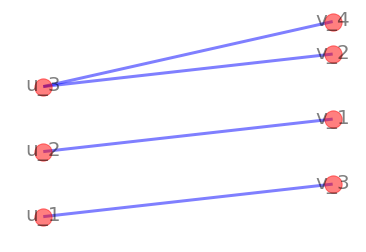

In [19]:
graph = nx.Graph()
for v in prob.variables():
    if v.value():
        _, u, v = v.name.split("_")
        graph.add_edge('u_'+ str(u), 'v_' + str(v))
        
pos = {}
for i, n in enumerate(graph.nodes()):
    x = 0 if 'u' in n else 1 #u:0, v:1
    pos[n] = (x,i)
    
    
pos_labels = {}
for k, v in pos.items():
    pos_labels[k] = (v[0], v[1]+1)

nx.draw_networkx(graph, pos, edge_color="blue", font_size=20, alpha=0.5, width=3)
# nx.draw_networkx_labels(graph, pos_labels, labels)

plt.axis('off')
plt.show() 

# Ref
- [python - Solving a Maximum weight bipartite b-matching - Stack Overflow](https://stackoverflow.com/questions/50908267/solving-a-maximum-weight-bipartite-b-matching)